In [80]:
# importing the necessary modules
import requests
from bs4 import BeautifulSoup
from zipfile import ZipFile
from io import BytesIO
import pandas as pd
import os
from IPython.display import display
import seaborn as sns
import missingno as msno

In [49]:
# Creating a new file to store the zip file links
#newfile = open('zipfiles.txt','w')
#Set variable for page to be opened and url to be concatenated 
page =requests.get('https://www.opm.gov/data/index.aspx')
baseurl= 'https://www.opm.gov/'
#Use BeautifulSoup to clean up the page
soup = BeautifulSoup(page.text, "html.parser")
soup.prettify()

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">\n <head>\n  <link href="/favicon.ico" rel="shortcut icon"/>\n  <title>\n   Data, Analysis &amp; Documentation : Raw Datasets - OPM.gov\n  </title>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="Welcome to opm.gov" name="description"/>\n  <meta content="OPM,Office of Personnel Management,opm.gov" name="keywords"/>\n  <meta name="Expires"/>\n  <meta content="3.0" name="TemplateVersion"/>\n  <meta content="568256384" property="fb:admins"/>\n  <meta content="121223957945585" property="fb:app_id"/>\n  <meta content="government" property="og:type"/>\n  <meta content="U.S. Office of Personnel Management" property="og:site_name"/>\n  <script src="//ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js" type="text/javascript">\n  </script>

In [50]:
# Creating a new file to store the zip file links
newfile = open('zipfiles.txt','w')
#Find all the links on the page that end in .zip and write them into the text file
for anchor in soup.findAll('a', href=True):
    links = anchor['href']
    if links.endswith('.zip'):
        newfile.write(links + '\n')
newfile.close()


In [51]:
#Fetching the links for the zip file and downloading the files
with open('zipfiles.txt', 'r') as links:
    count = 0
    for link in links:
        if count == 2:
            break
        if link:
            filename1= link.split('/')[-1]
            filename= filename1[:-1]
            link = baseurl + link
            print(filename + ' file started to download')
            response = requests.get(link[:-1])
            
            # Writing the zip file into local file system
            with open(filename,'wb') as output_file:
                output_file.write(response.content)
            print(filename + ' file is downloaded')
            with ZipFile(filename, 'r') as zip:
                # printing all the contents of the zip file
                #zip.printdir()
                print('')
            z = ZipFile(BytesIO(response.content))
            # gets September data
            if count == 0:
                def new_directory(directory, filename):
                  # Before creating a new directory, check to see if it already exists
                  if os.path.isdir(directory) == False:
                    os.mkdir(directory)
                #print(directory+" "+filename)
                z.extractall('SepData')
                print('September data Extracted')
                print('-------------------------------------------------------------')
            # gets June data    
            elif count == 1:
                def new_directory(directory, filename):
                  # Before creating a new directory, check to see if it already exists
                  if os.path.isdir(directory) == False:
                    os.mkdir('JunData')
                z.extractall('JunData')
                print('June data Extracted')
            count += 1
            

5f8e430d-fb84-4856-a25b-81f6dcc0eb7f.zip file started to download
5f8e430d-fb84-4856-a25b-81f6dcc0eb7f.zip file is downloaded

September data Extracted
-------------------------------------------------------------
9a772b04-cab4-4b89-b62a-a3859371cb13.zip file started to download
9a772b04-cab4-4b89-b62a-a3859371cb13.zip file is downloaded

June data Extracted


In [52]:
# Importing September data using pandas
FACTDATA_S = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/SeptData/FACTDATA_SEP2021.txt")
print('Glimpse of September data')
FACTDATA_S

Glimpse of September data


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,F,13,NaN,F,0340,2,ES,ES-**,S,XXXX,2,50,F,1,202109,1,192500.0,18.3
1,AA00,11,I,15,NaN,H,0905,1,ES,ES-**,R,XXXX,2,50,F,1,202109,1,187000.0,28.7
2,AA00,11,E,15,15,E,0905,1,99,GS-15,Q,XXXX,2,30,F,1,202109,1,172500.0,12.0
3,AA00,11,E,15,15,E,0905,1,99,GS-15,N,XXXX,8,30,F,1,202109,1,144128.0,10.0
4,AA00,11,F,15,13,E,0905,1,99,GS-13,K,XXXX,8,30,F,1,202109,1,114059.0,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191006,ZS00,11,I,01,NaN,A,0301,2,99,AD-00,Q,XXXX,8,48,I,2,202109,1,173074.0,0.6
2191007,ZS00,11,C,17,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202109,1,57000.0,0.3
2191008,ZS00,11,D,04,NaN,B,0301,2,99,AD-00,G,XXXX,8,48,F,2,202109,1,75500.0,2.7
2191009,ZS00,11,C,04,NaN,A,0301,2,99,AD-00,D,XXXX,8,48,F,2,202109,1,41000.0,0.1


In [53]:
# Importing June data using pandas
FACTDATA_J = pd.read_csv("/Users/tejaswidodda/Documents/GMU/Spring 2022/DAEN 690/Jupyter_Code/JuneData/FACTDATA_JUN2021.txt")
print('Glimpse of June data')
FACTDATA_J

Glimpse of June data


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,F,13,NaN,F,340,2,ES,ES-**,R,XXXX,2,50,F,1,202106,1,181500.0,18.0
1,AA00,11,I,15,NaN,H,905,1,ES,ES-**,R,XXXX,2,50,F,1,202106,1,181500.0,28.4
2,AA00,11,E,15,15,E,905,1,99,GS-15,Q,XXXX,2,30,F,1,202106,1,172500.0,11.8
3,AA00,11,D,15,15,D,905,1,99,GS-15,N,XXXX,8,30,F,1,202106,1,144128.0,9.8
4,AA00,11,F,15,13,E,905,1,99,GS-13,K,XXXX,8,30,F,1,202106,1,114059.0,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188918,ZS00,11,I,01,NaN,A,0301,2,99,AD-00,Q,XXXX,8,48,I,2,202106,1,173074.0,0.3
2188919,ZS00,11,C,17,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202106,1,57000.0,0.1
2188920,ZU00,11,K,17,NaN,E,0301,2,99,AD-00,Q,XXXX,8,48,F,2,202106,1,170800.0,14.1
2188921,ZU00,11,E,17,NaN,D,0301,2,99,AD-00,K,XXXX,8,38,F,1,202106,1,112930.0,8.0


In [54]:
# Finding datatypes of each variable
FACTDATA_S.dtypes

AGYSUB         object
LOC            object
AGELVL         object
EDLVL          object
GSEGRD         object
LOSLVL         object
OCC            object
PATCO           int64
PP             object
PPGRD          object
SALLVL         object
STEMOCC        object
SUPERVIS       object
TOA            object
WORKSCH        object
WORKSTAT        int64
DATECODE        int64
EMPLOYMENT      int64
SALARY        float64
LOS           float64
dtype: object

In [68]:
#Finding missing values
SM = FACTDATA_S.isnull().sum()
JM = FACTDATA_J.isnull().sum()
# Displays both months result in a single table. 0-Sept and 1-June
pd.concat([SM, JM], axis=1)

,0,1
AGYSUB,0,0
LOC,0,0
AGELVL,0,0
EDLVL,4331,5150
GSEGRD,643370,638500
LOSLVL,0,0
OCC,0,0
PATCO,0,0
PP,0,0
PPGRD,0,0


In [77]:
#Finding the count of unique values in each column
SU = FACTDATA_S.nunique()
JU = FACTDATA_J.nunique()
pd.concat([SU, JU], axis=1)

,0,1
AGYSUB,537,537
LOC,221,218
AGELVL,12,12
EDLVL,45,45
GSEGRD,31,31
LOSLVL,11,11
OCC,1224,1223
PATCO,7,7
PP,6,6
PPGRD,1008,1024


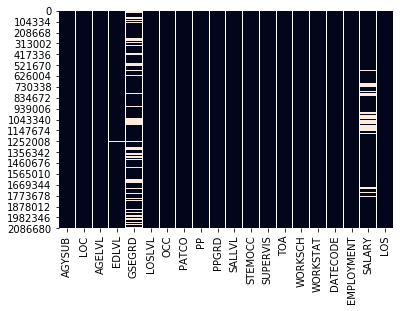

In [81]:
# Missing values plot for Sep
sns.heatmap(FACTDATA_S.isnull(), cbar=False)

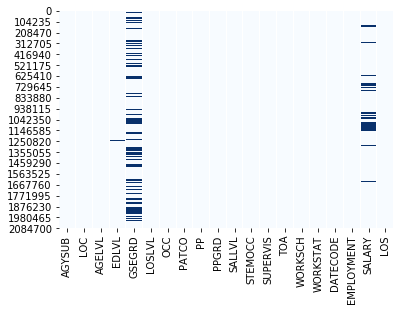

In [92]:
# Missing values plot for June
sns.heatmap(FACTDATA_J.isnull(), cbar=False, cmap="Blues")

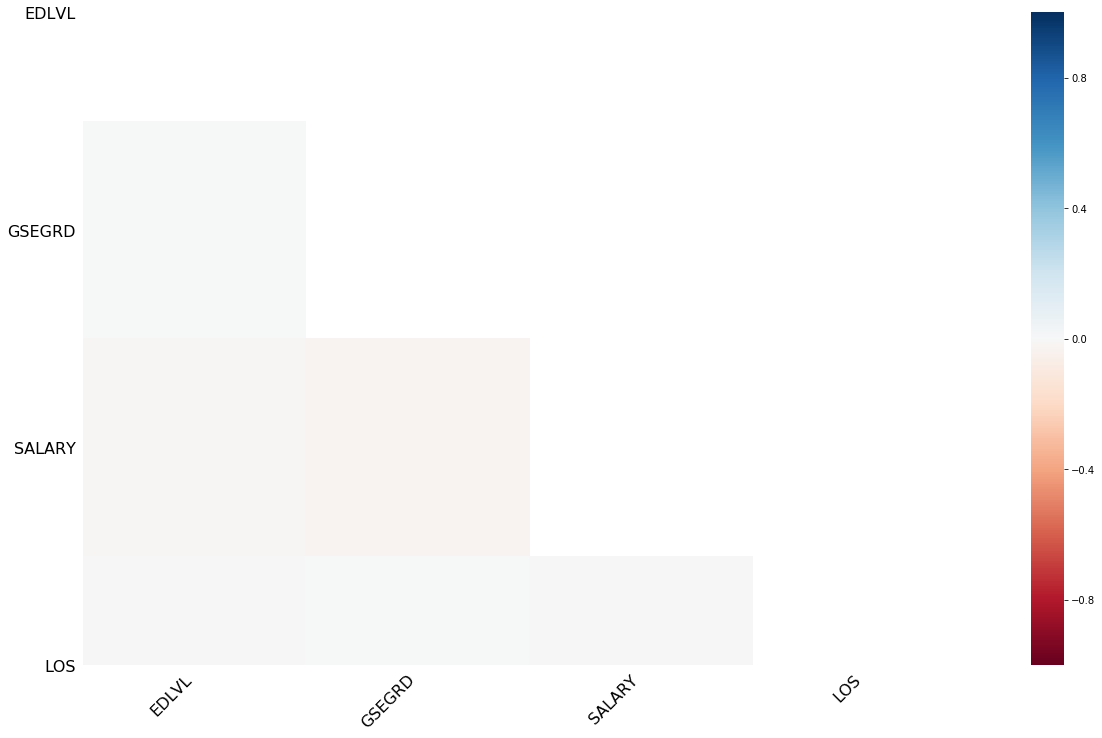

In [85]:
msno.heatmap(FACTDATA_S)

In [89]:
corr = FACTDATA_S.corr()
corr

,PATCO,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
PATCO,1.000000,0.056693,NaN,NaN,-0.480592,-0.114614
WORKSTAT,0.056693,1.000000,NaN,NaN,-0.113462,-0.205685
DATECODE,NaN,NaN,NaN,NaN,NaN,NaN
EMPLOYMENT,NaN,NaN,NaN,NaN,NaN,NaN
SALARY,-0.480592,-0.113462,NaN,NaN,1.000000,0.319433
LOS,-0.114614,-0.205685,NaN,NaN,0.319433,1.000000
